**Exploratory Data Analysis (EDA)**

In this part, we will do the EDA of the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize


import plotly.graph_objects as go
from nltk.corpus import stopwords

In [2]:
df=pd.read_csv('US_Accidents_March23.csv')
df=df.dropna()
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3402762,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,...,False,False,False,False,False,False,Night,Night,Night,Night
3402767,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,...,False,False,False,False,False,False,Day,Day,Day,Day
3402771,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,...,False,False,False,False,False,False,Day,Day,Day,Day
3402773,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,...,False,False,False,False,False,False,Day,Day,Day,Day
3402774,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,0.307,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


The Number of the Accident in each state

In [3]:
state_counts = df['State'].value_counts()

fig = go.Figure(
    data=go.Choropleth(
        locations=state_counts.index,
        z=state_counts.values.astype(float),
        locationmode='USA-states',
        colorscale='turbo',
        colorbar_title='Accidents'
    )
)
fig.update_layout(
    title_text='Number of US Accidents for Each State',
    geo_scope='usa' 
)
fig.show()


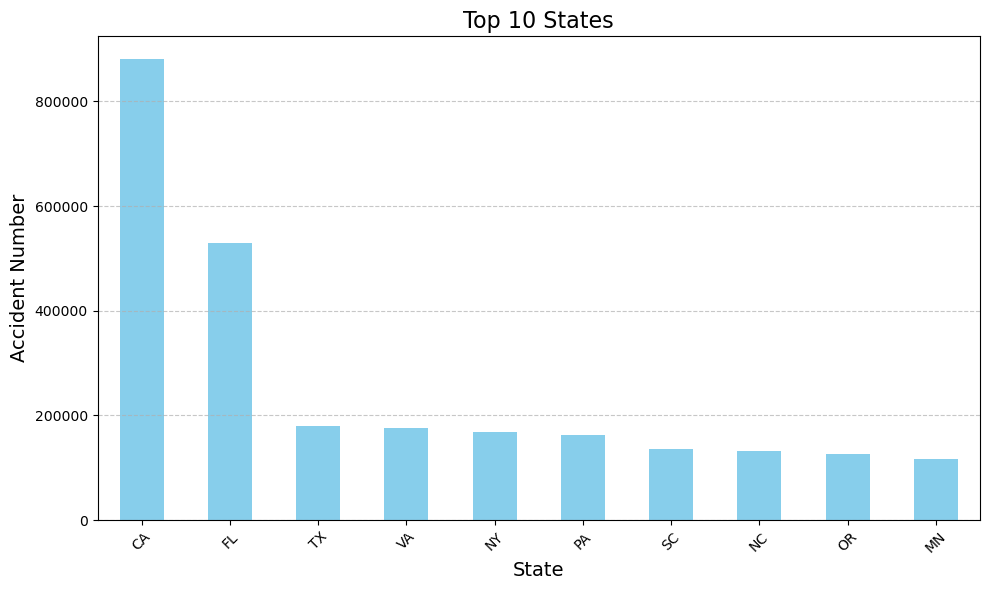

In [4]:
# Display the top 10 states by accident count
top_10_states = state_counts.head(10)

# Plotting the top 10 states
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Accident Number', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

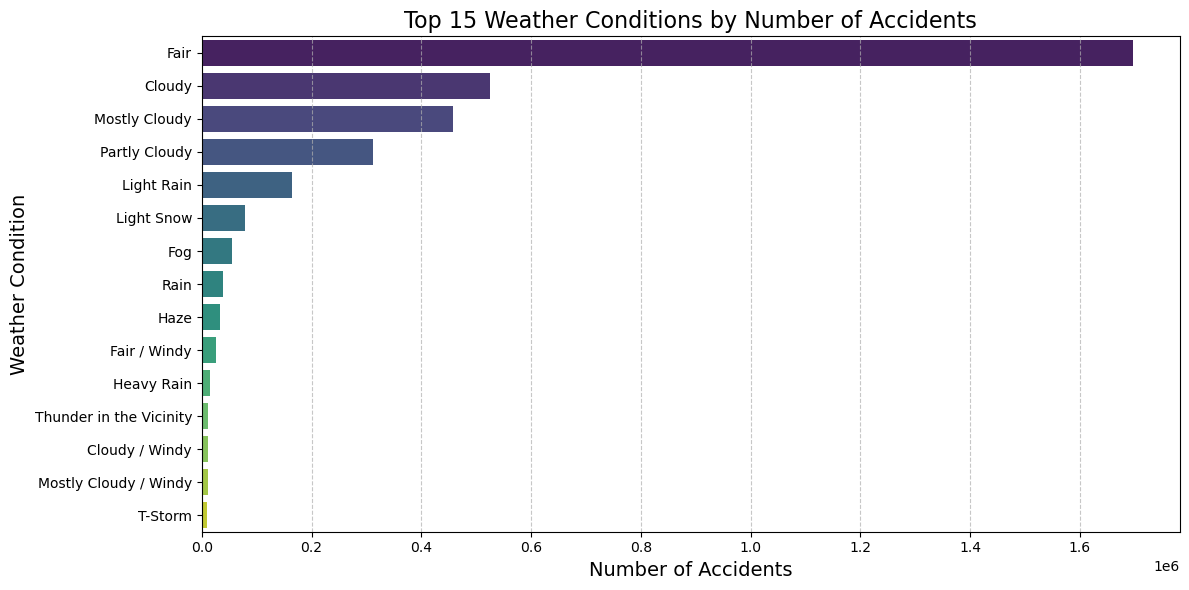

In [5]:
df = df[df['Weather_Condition'].notna()]


weather_counts = df['Weather_Condition'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=weather_counts.values,
    y=weather_counts.index,
    palette='viridis'
)
plt.title('Top 15 Weather Conditions by Number of Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Weather Condition', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Severity and Weather conditions

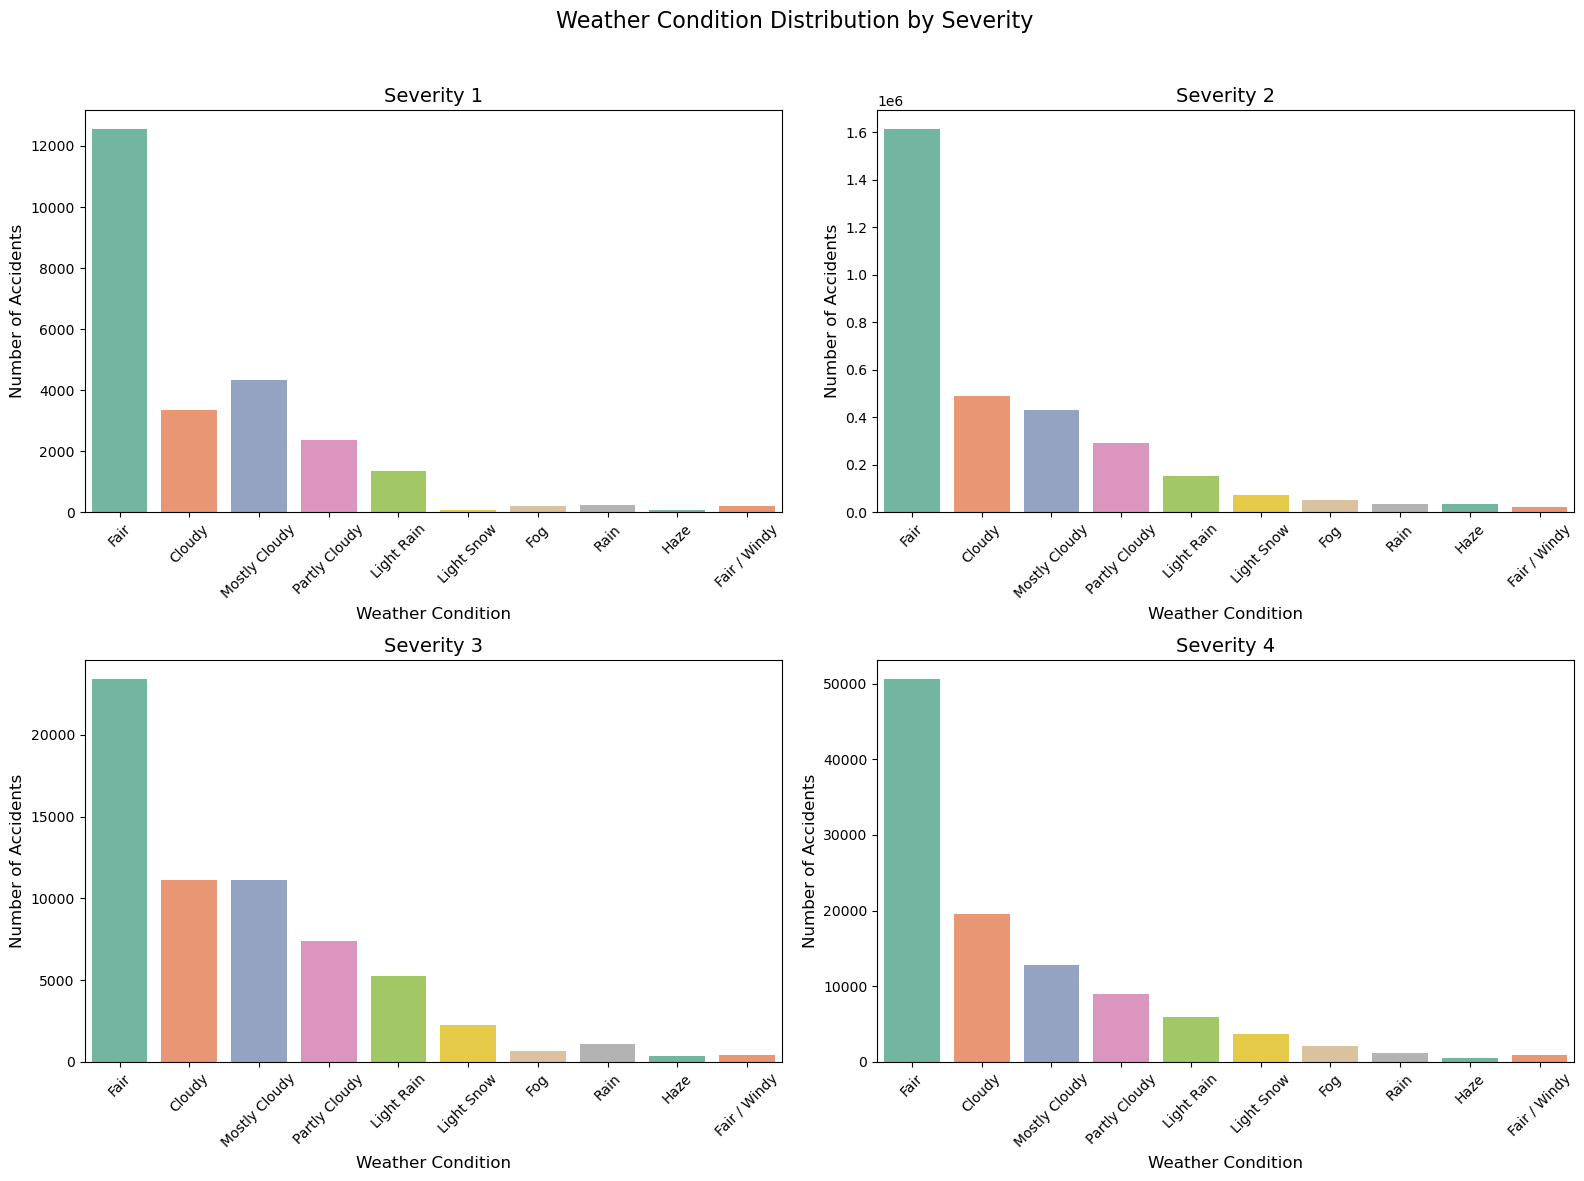

In [6]:
top_weather_conditions = df['Weather_Condition'].value_counts().head(10).index
filtered_df = df[df['Weather_Condition'].isin(top_weather_conditions)]


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
severity_levels = [1, 2, 3, 4]

for i, severity in enumerate(severity_levels):
    ax = axes[i // 2, i % 2]
    severity_df = filtered_df[filtered_df['Severity'] == severity]
    
    sns.countplot(
        data=severity_df,
        x='Weather_Condition',
        ax=ax,
        order=top_weather_conditions,
        palette='Set2'
    )
    ax.set_title(f'Severity {severity}', fontsize=14)
    ax.set_xlabel('Weather Condition', fontsize=12)
    ax.set_ylabel('Number of Accidents', fontsize=12)
    ax.tick_params(axis='x', rotation=45)


fig.suptitle('Weather Condition Distribution by Severity', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Word Cloud for Severity 4

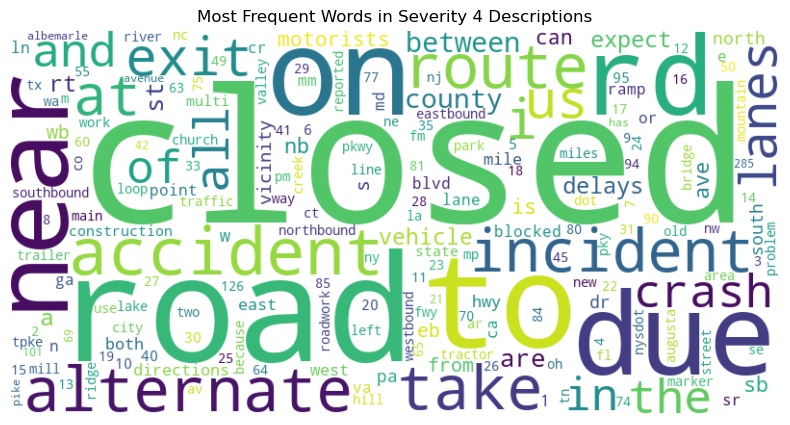

In [7]:
severity_4 = df[df['Severity'] == 4]


descriptions = severity_4['Description'].dropna()

words = []
for desc in descriptions:
    words.extend(re.findall(r'\b\w+\b', desc.lower()))

word_counts = Counter(words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Severity 4 Descriptions")
plt.show()

Relationship between Duration and Distance

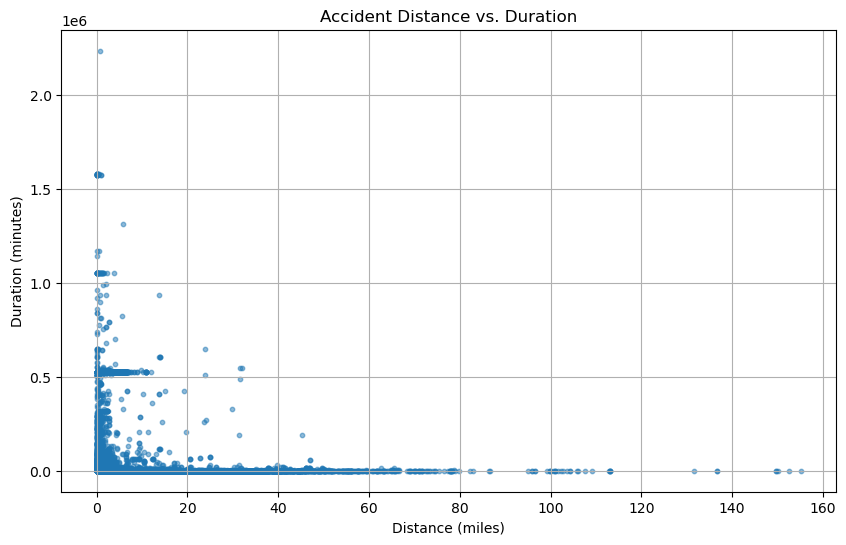

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

df = df.dropna(subset=['Start_Time', 'End_Time'])

df['Duration(minutes)'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

df_filtered = df[df['Duration(minutes)'] > 0]

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Distance(mi)'], df_filtered['Duration(minutes)'], alpha=0.5, s=10)
plt.title('Accident Distance vs. Duration')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

Accident Frequency by State and Hour

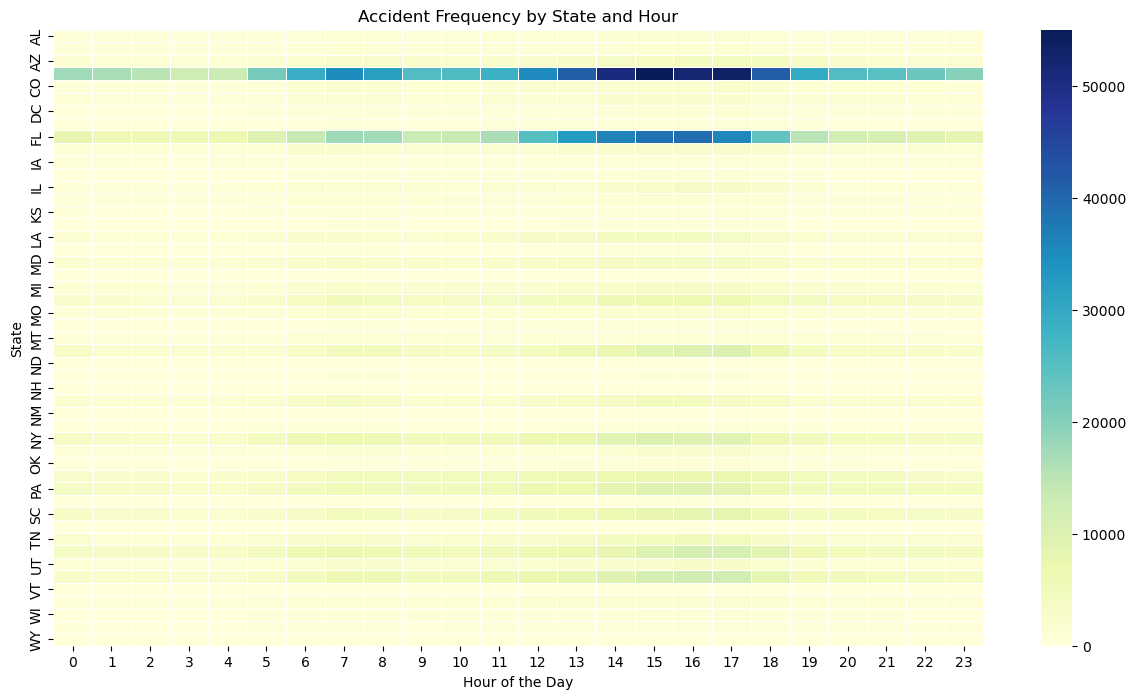

In [9]:
df['Hour'] = df['Start_Time'].dt.hour

state_hourly = df.groupby(['State', 'Hour']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
sns.heatmap(state_hourly, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Accident Frequency by State and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('State')
plt.show()

Impact of Weather and Light on the number of accidents

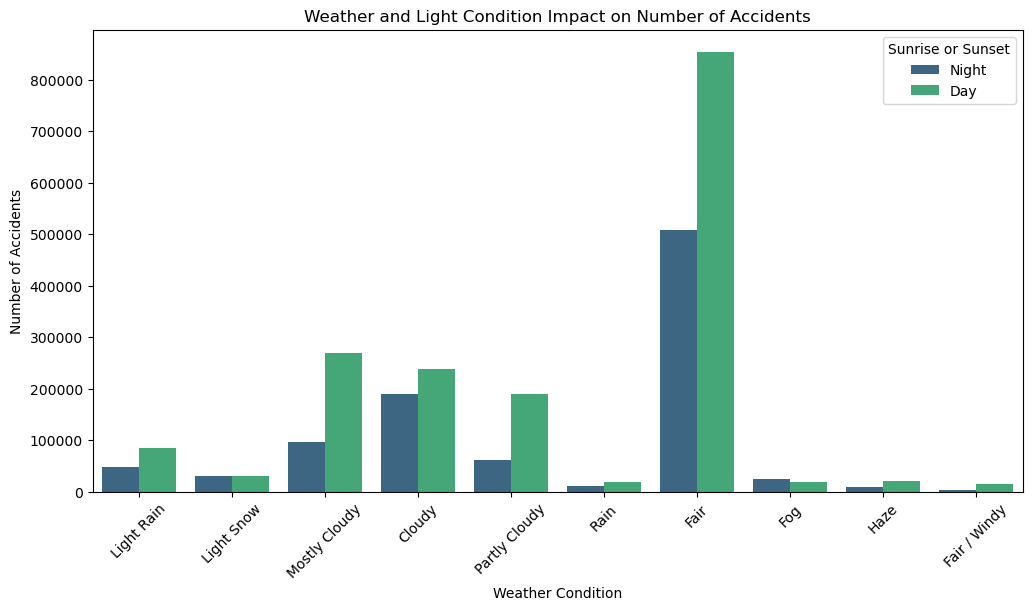

In [10]:
common_weather = df['Weather_Condition'].value_counts().head(10).index
weather_light = df[df['Weather_Condition'].isin(common_weather)]

plt.figure(figsize=(12, 6))
sns.countplot(data=weather_light, x='Weather_Condition', hue='Sunrise_Sunset', palette='viridis')
plt.title('Weather and Light Condition Impact on Number of Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Sunrise or Sunset')
plt.show()

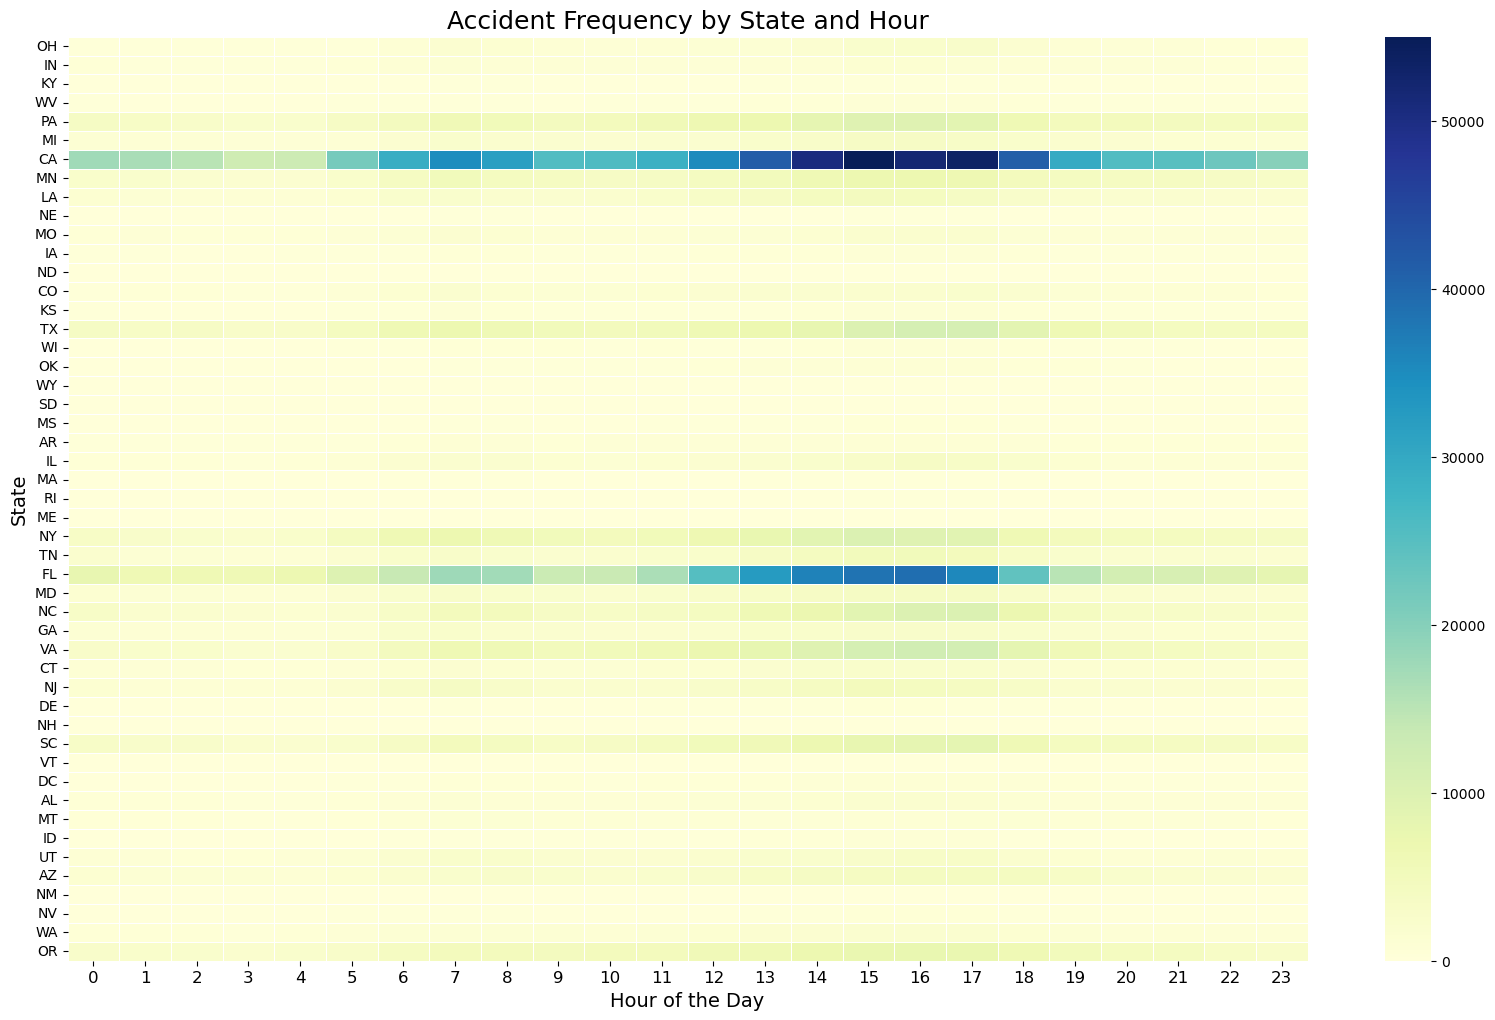

In [11]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['Hour'] = df['Start_Time'].dt.hour

all_states = df['State'].unique() 
state_hourly = df.groupby(['State', 'Hour']).size().unstack(fill_value=0)
state_hourly = state_hourly.reindex(all_states, fill_value=0) 


plt.figure(figsize=(20, 12)) 
sns.heatmap(
    state_hourly,
    cmap='YlGnBu',
    cbar=True,
    linewidths=0.5
)
plt.title('Accident Frequency by State and Hour', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.show()

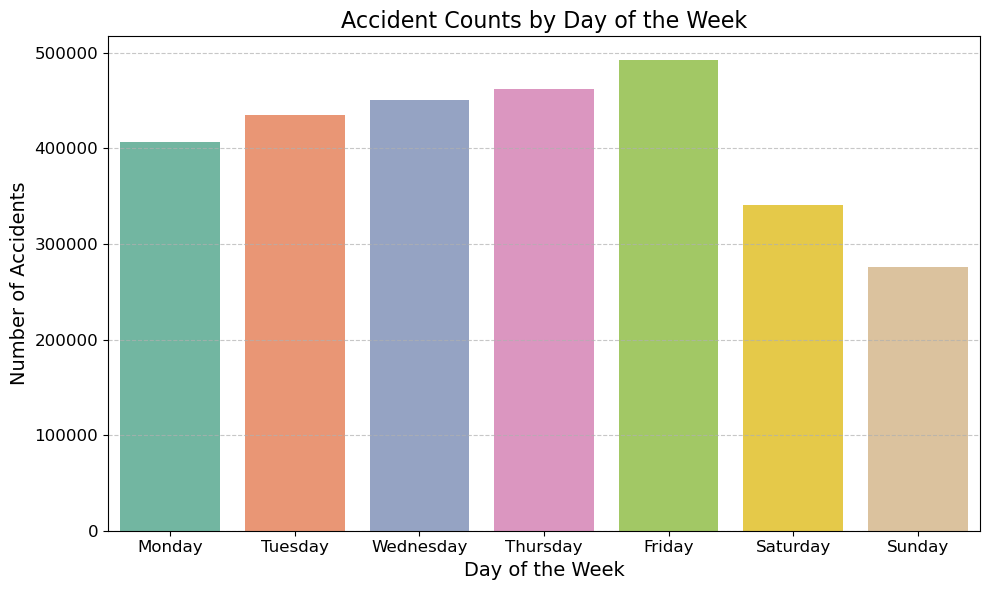

In [12]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

df['Day_of_Week'] = df['Start_Time'].dt.dayofweek


day_name_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Day_Name'] = df['Day_of_Week'].map(day_name_mapping)


day_counts = df['Day_Name'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


plt.figure(figsize=(10, 6))
sns.barplot(
    x=day_counts.index,
    y=day_counts.values,
    palette='Set2'
)
plt.title('Accident Counts by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

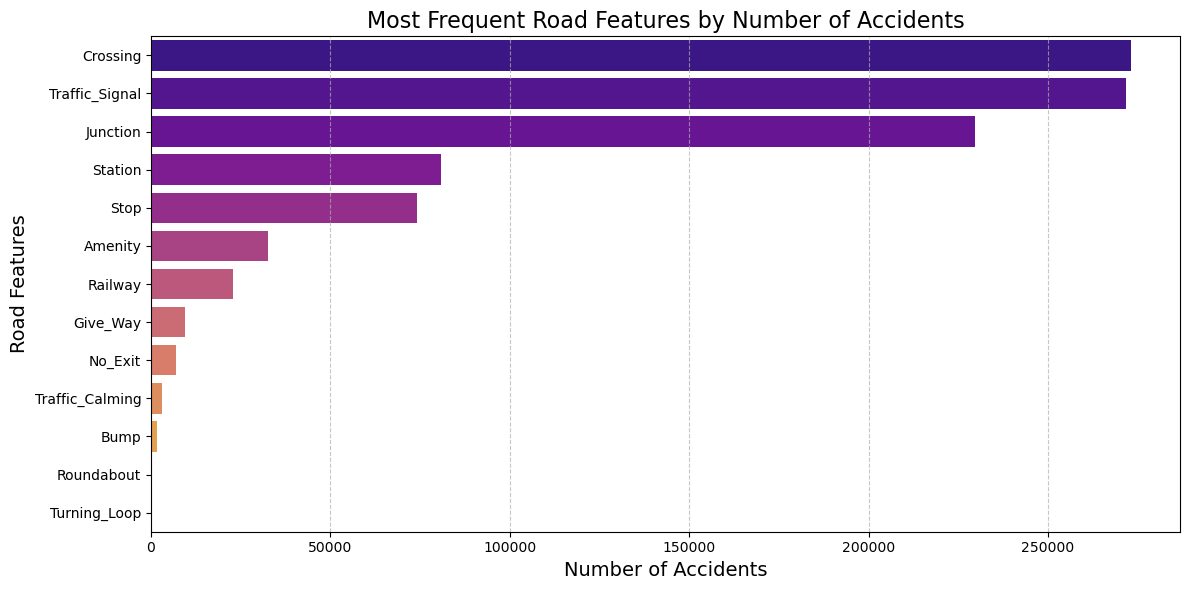

In [13]:
road_features = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Turning_Loop'
]

feature_counts = df[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=feature_counts.values,
    y=feature_counts.index,
    palette='plasma'
)
plt.title('Most Frequent Road Features by Number of Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Road Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

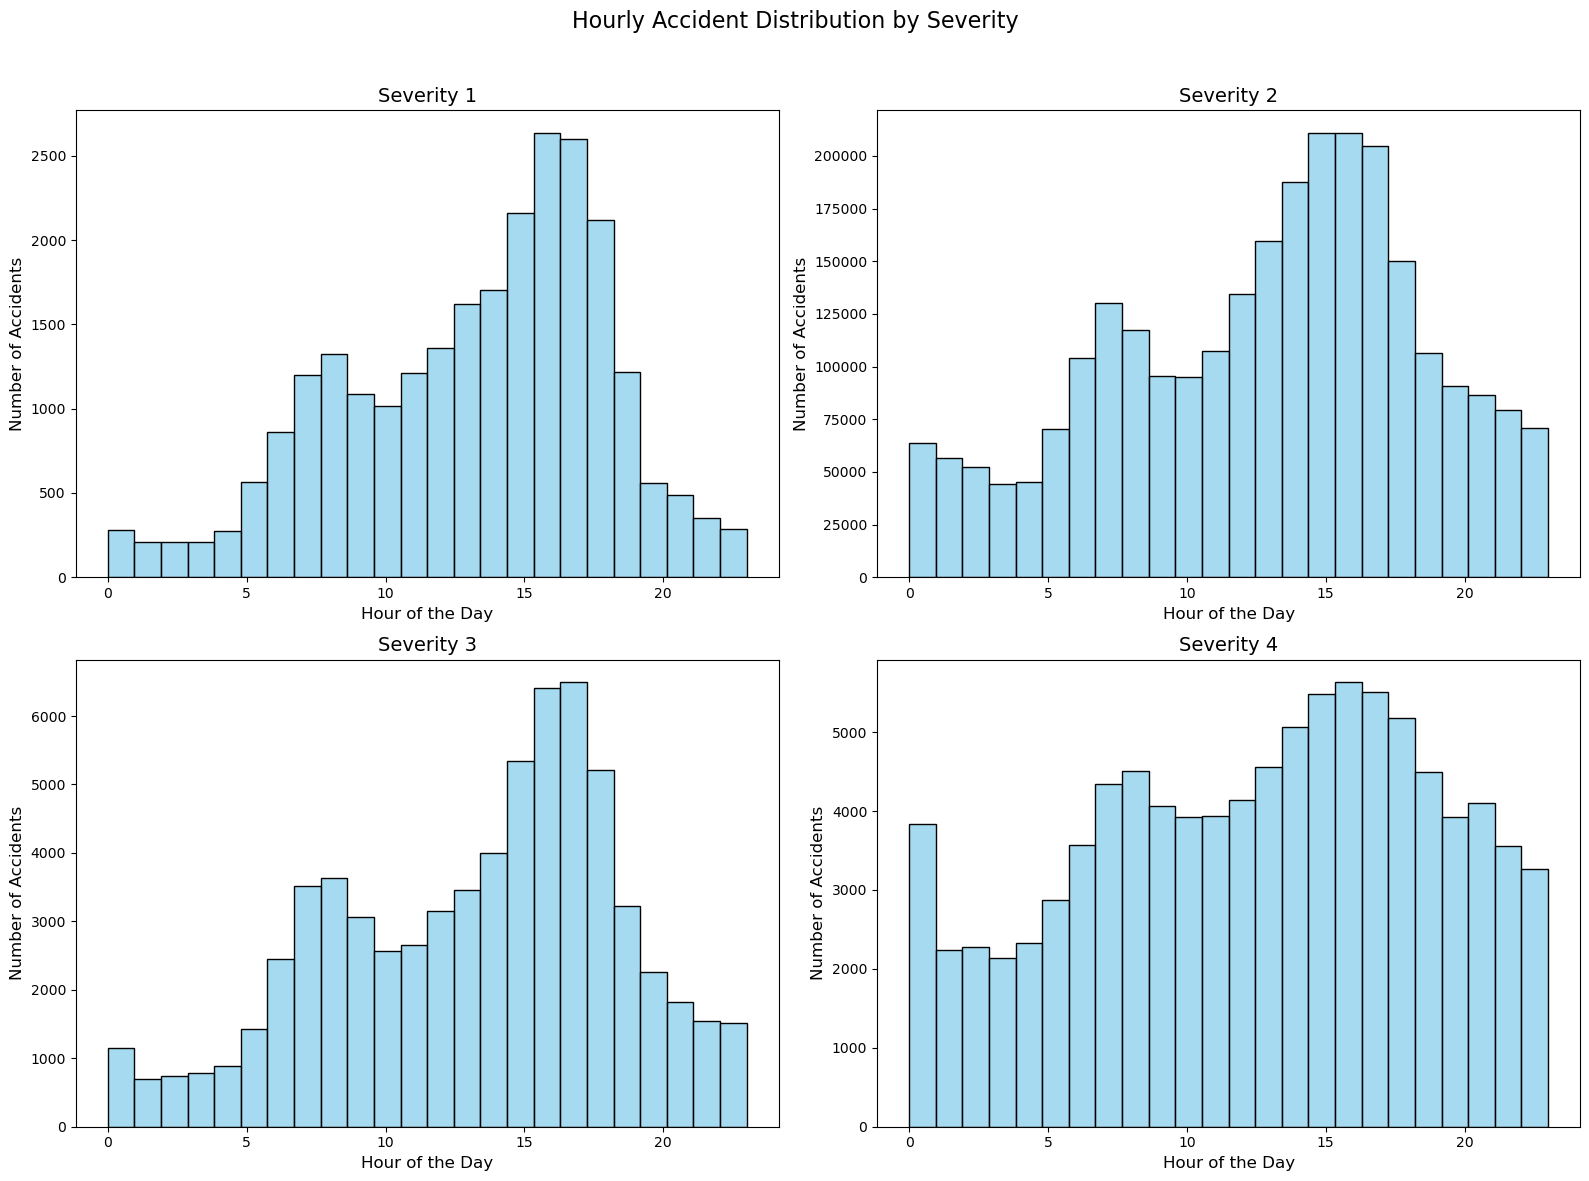

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, severity in enumerate(severity_levels):
    ax = axes[i // 2, i % 2]
    severity_df = df[df['Severity'] == severity]
    
    sns.histplot(
        data=severity_df,
        x='Hour',
        ax=ax,
        bins=24,
        kde=False,
        color='skyblue'
    )
    ax.set_title(f'Severity {severity}', fontsize=14)
    ax.set_xlabel('Hour of the Day', fontsize=12)
    ax.set_ylabel('Number of Accidents', fontsize=12)

fig.suptitle('Hourly Accident Distribution by Severity', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

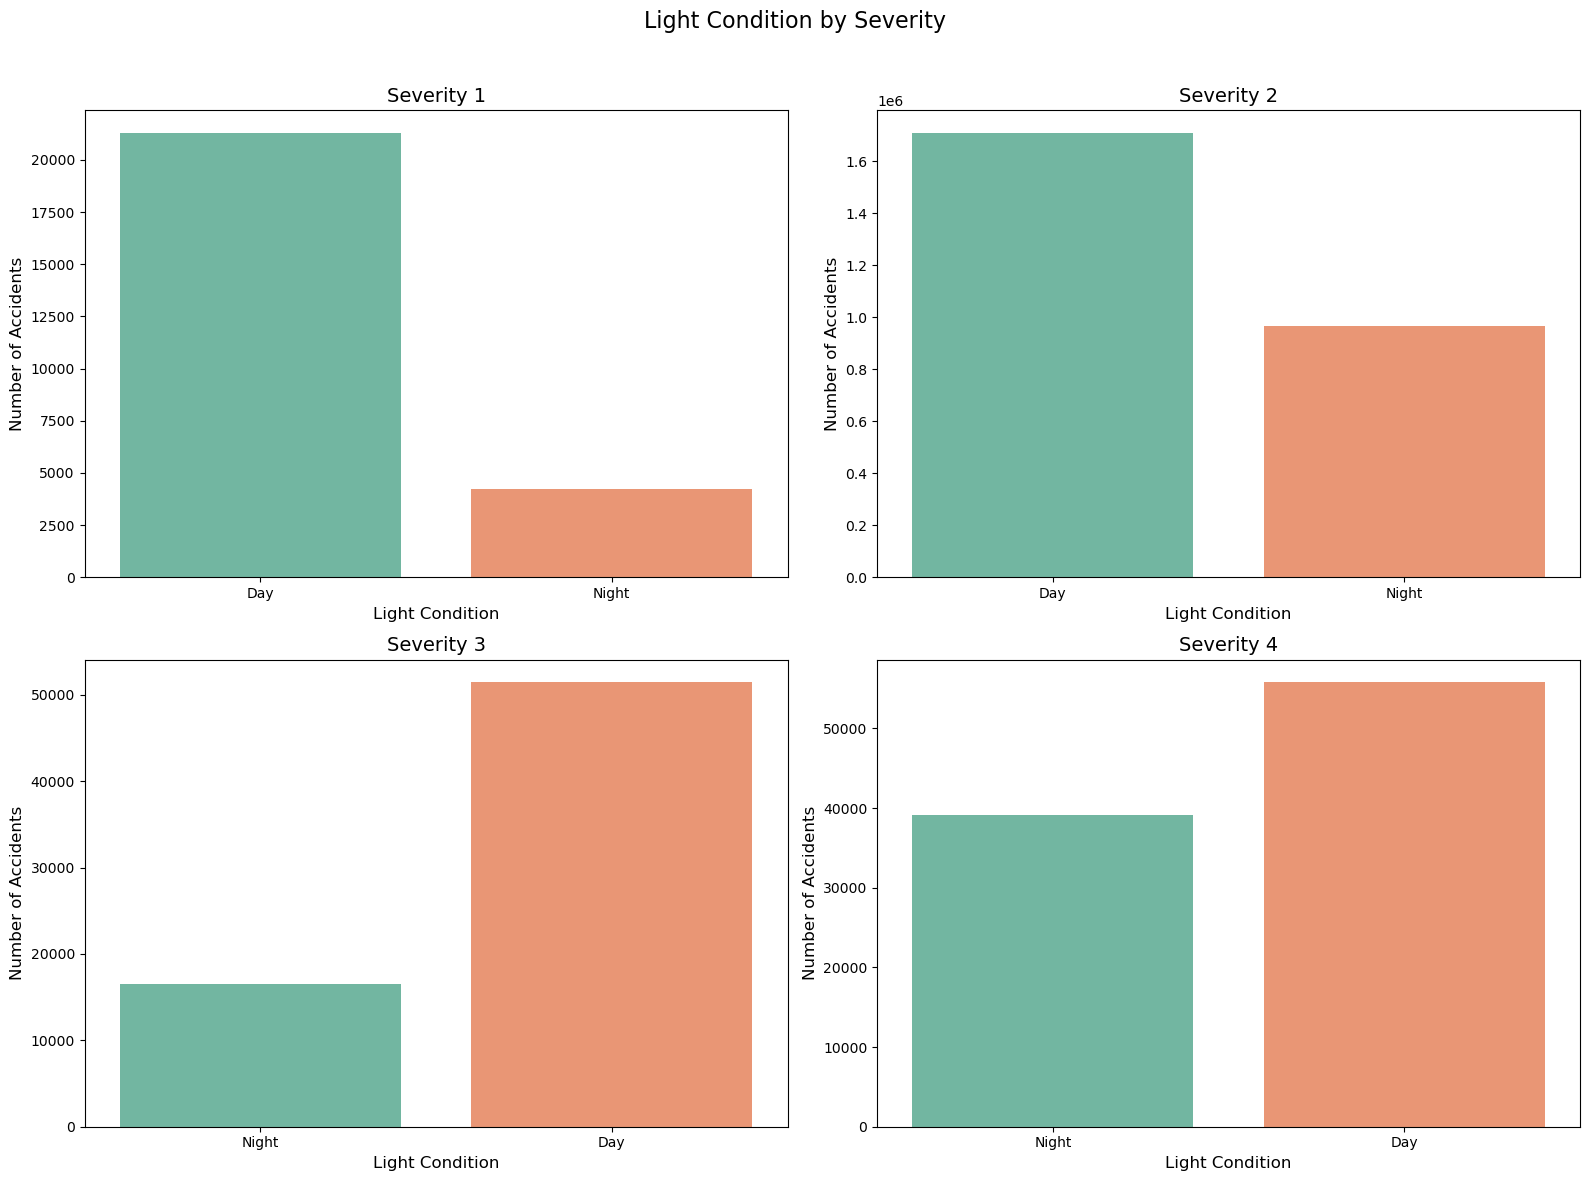

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, severity in enumerate(severity_levels):
    ax = axes[i // 2, i % 2]
    severity_df = df[df['Severity'] == severity]
    
    sns.countplot(
        data=severity_df,
        x='Sunrise_Sunset',
        ax=ax,
        palette='Set2'
    )
    ax.set_title(f'Severity {severity}', fontsize=14)
    ax.set_xlabel('Light Condition', fontsize=12)
    ax.set_ylabel('Number of Accidents', fontsize=12)

fig.suptitle('Light Condition by Severity', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

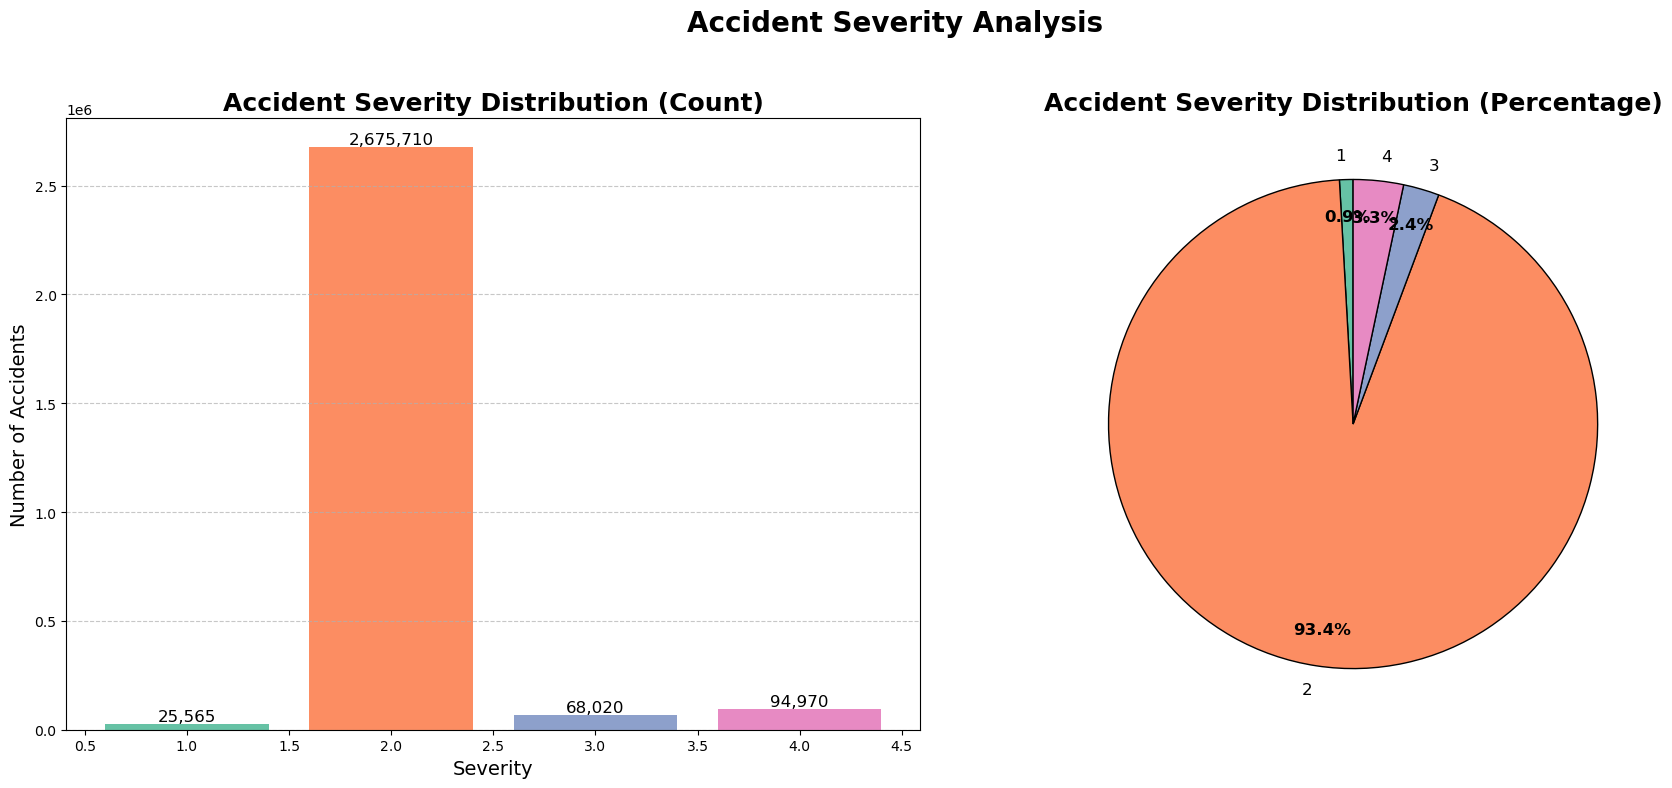

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设数据已经加载到 df 中，并包含 'Severity' 列
if 'Severity' in df.columns:
    # 统计每种严重程度的数量和比例
    severity_counts = df['Severity'].value_counts().sort_index()
    severity_percentages = (severity_counts / severity_counts.sum()) * 100

    # 创建一个 1x2 的子图布局
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # 条形图：展示严重程度的数量分布
    bars = axes[0].bar(severity_counts.index, severity_counts.values, color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
    axes[0].set_title('Accident Severity Distribution (Count)', fontsize=18, fontweight='bold')
    axes[0].set_xlabel('Severity', fontsize=14)
    axes[0].set_ylabel('Number of Accidents', fontsize=14)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # 在条形图上添加数值标签
    for bar in bars:
        axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height()):,}', 
                     ha='center', va='bottom', fontsize=12)

    # 自定义函数，确保百分比标签不重叠
    def autopct_generator(pct):
        return f'{pct:.1f}%' if pct > 0.5 else ''

    # 饼图：展示严重程度的比例分布
    wedges, texts, autotexts = axes[1].pie(
        severity_percentages.values,
        labels=severity_counts.index,
        autopct=autopct_generator,
        pctdistance=0.85,  # 调整百分比标签的位置
        labeldistance=1.1,  # 调整标签距离
        colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
        startangle=90,
        textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'black'}
    )
    axes[1].set_title('Accident Severity Distribution (Percentage)', fontsize=18, fontweight='bold')

    # 调整饼图标签样式
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)
        autotext.set_weight('bold')

    # 全局标题
    plt.suptitle('Accident Severity Analysis', fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("The 'Severity' column is not found in the dataset.")
